<Axes: ylabel='count'>

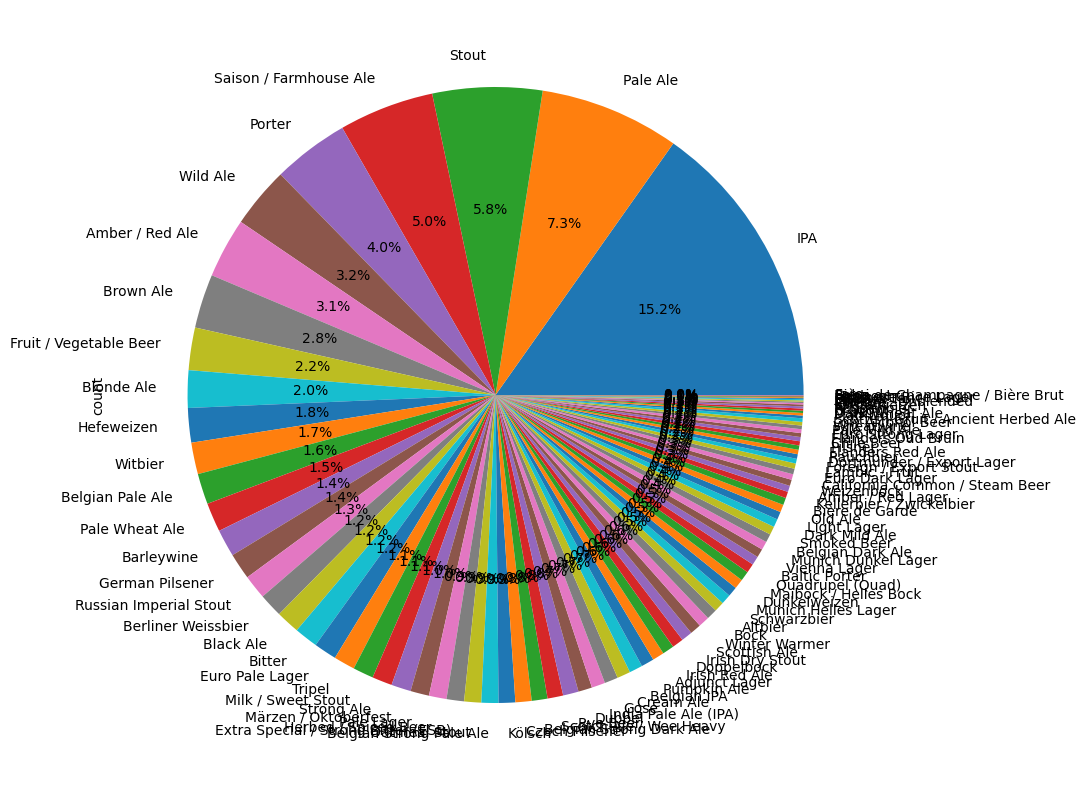

In [1]:
import pandas as pd


df = pd.read_csv('beers.csv')

df['style'] = df['style'].str.replace('American ', '')
df['style'] = df['style'].str.replace('Double / Imperial ', '')
df['style'] = df['style'].str.replace('English ', '')
df['style'] = df['style'].str.replace(' (APA)', '')

style_count = df['style'].value_counts()
style_count.plot.pie(autopct='%1.1f%%', figsize=(10,10))

In [2]:
# count occurences of beer_id in ratings.csv

ratings = pd.read_csv('ratings.csv')


In [3]:
ratings_count = ratings['beer_id'].value_counts()

In [4]:
print(df.columns)

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')


In [ ]:
# map beer_id to style and name in beers.csv
df = df.set_index('beer_id')
ratings_count = ratings_count.to_frame().join(df[['style', 'beer_name']])
# plot top 10 styles
# plot top 10 beers


: 

In [ ]:

import matplotlib.pyplot as plt

# Group by 'name' and 'style' to get the total count for each
beer_counts = ratings_count.groupby('beer_name')['count'].sum()
style_counts = ratings_count.groupby('style')['count'].sum()

# Plot the pie chart for beer names
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(beer_counts, labels=beer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Counts by Beer Name')

# Plot the pie chart for styles
plt.subplot(1, 2, 2)
plt.pie(style_counts, labels=style_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Counts by Beer Style')

plt.tight_layout()
plt.show()

In [ ]:
import wordcloud